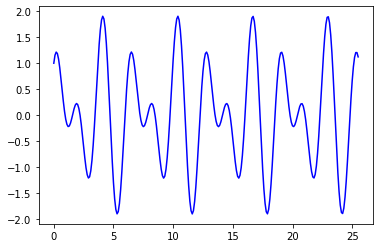

In [78]:
import math
import matplotlib.pyplot as plt 

x = [0.1*i for i in range(256)]
y = []

n = len(x)

for i in range(n):
    y.append(math.cos(3*x[i]) + math.sin(2*x[i]))
    
plt.plot(x, y, color='blue') 

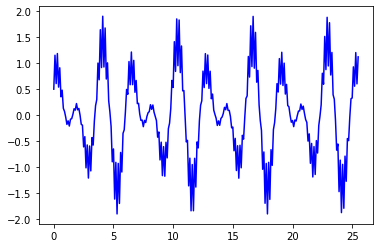

In [79]:
#Сигнал с помехами

z = [y[i] for i in range(n)]

for i in range(0, n, 2):
    z[i] = y[i] * 0.5
    
plt.plot(x, z, color='blue') 

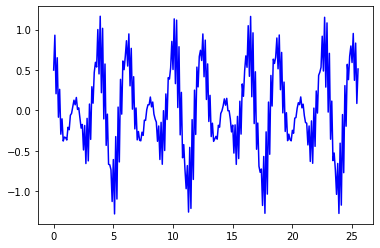

In [80]:
#Однополюсный ВЧ фильтр

def high_recursive_filter(x, f):
    y = []
    x0 = math.e ** (-1 * 2 * math.pi * f)
    a0 = (1 + x0) / 2
    a1 = - a0
    b1 = x0
    y.append(x[0])
    
    for i in range(1, len(x)):
        y.append(x[i]*a0 + x[i-1]*a1 + y[i-1]*b1)
    
    return y

plt.plot(x, high_recursive_filter(z, 0.05), color='blue') 

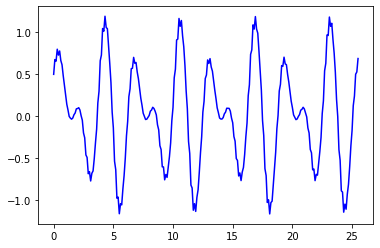

In [81]:
#Однополюсный НЧ фильтр

y1 = []
x0 = math.e ** (-1 * 2 * math.pi * 0.05)
a0 = 1 - x0
b1 = x0
y1.append(z[0])

for i in range(1, n):
    y1.append(z[i]*a0 + y1[i-1]*b1)

plt.plot(x, y1, color='blue') 

In [82]:
x0

0.7304026910486456

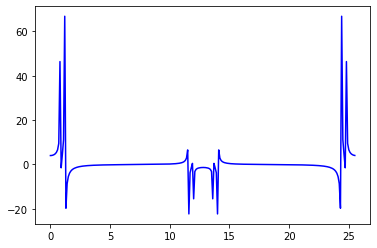

In [56]:
def bpf(a, n, e):
    m = len(a)
    if m == 1:
        return a
    else:
        b_ch = []
        b_nch = []
        for i in range(m):
            if i % 2 == 0:
                b_ch.append(a[i])
            else:
                b_nch.append(a[i])
        b_ch = bpf(b_ch, n, e)
        b_nch = bpf(b_nch, n, e)
        
        y = [0 for i in range(len(a))]
        w_n = e ** ((2*math.pi*complex(0, 1)) / n)
        w_n = w_n ** (n // m)
        w = 1
        for i in range(m // 2):
            t = w*b_nch[i]
            y[i] = b_ch[i] + t
            y[i+(m//2)] = b_ch[i] - t
            w = w*w_n
        return y
    
z1 = bpf(z, n, math.e)

plt.plot(x, z1, color='blue') 

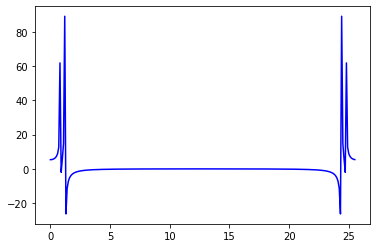

In [57]:
plt.plot(x, bpf(y, n, math.e), color='blue') 

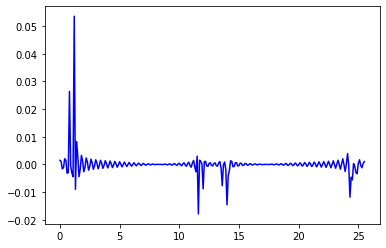

In [101]:
#Оконный полосовой фильтр. Окно Хемминга

a = []
b = []
h = []
fc = 0.2

def k_for_nch(fc):
    a = []    
    m = 128
    
    for i in range(n):
        if i - m/2 == 0:
            a.append(2 * math.pi * fc)
        else:
            a.append(math.sin(2 * math.pi * fc * (i - m/2) ) / (i - m/2))
        a[i] *= (0.54 - 0.46*math.cos(2*math.pi*i/m))
        
    sum_a = sum(a)

    for i in range(n):
        a[i] /= sum_a
        
    return a

def inverse_f(b):
    for i in range(n):
        b[i] = -b[i]
    b[n//2] += 1
    
    return b

a = k_for_nch(0.25)
b = k_for_nch(0.253)
b = inverse_f(b)

for i in range(n):
    h.append(a[i]+b[i])
    
h = inverse_f(h)

y2 = []
for i in range(n):
    y2.append(z1[i]*h[i])

plt.plot(x, y2, color='blue') 

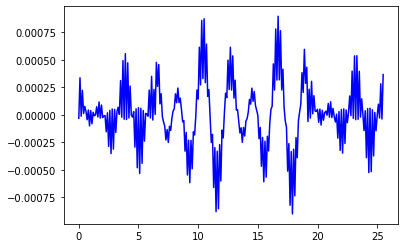

In [102]:
def obpf(a, n):    
    y = bpf(a, n, math.e ** (-1))
    for i in range(len(y)):
        y[i] /= n
    return y

plt.plot(x, obpf(y2, n), color='blue') 